# 为什么使用测试数据集


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m=100
np.random.seed(666)
x = np.random.uniform(-3,3,size=m)
y = x ** 2 + x + 3 + np.random.normal(0.,1.,size=m)
X=x.reshape(-1,1)

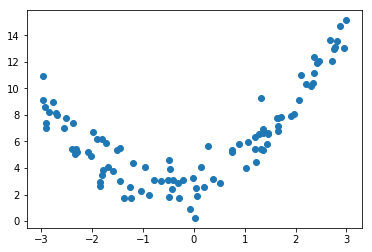

In [3]:
plt.scatter(x,y)
plt.show()

## 过拟合

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
def poly_regression(degree):
    return Pipeline(
    [
        ('poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lr',LinearRegression())
    ])

In [33]:
polyreg2 = poly_regression(2)
polyreg2.fit(X,y)
y_p2 = polyreg2.predict(X)
error2 = mean_squared_error(y_p2,y)
print(error2)

1.0987392142417856


In [34]:
polyreg100 = poly_regression(100)
polyreg100.fit(X,y)
y_p100 = polyreg100.predict(X)
error100=  mean_squared_error(y_p100,y)
print(error100)

0.6874183440089727


In [35]:
X_plot = np.linspace(-3,3,m).reshape(-1,1)
print('X.shape:',X_plot.shape)
y_plot =  polyreg100.predict(X_plot)

X.shape: (100, 1)


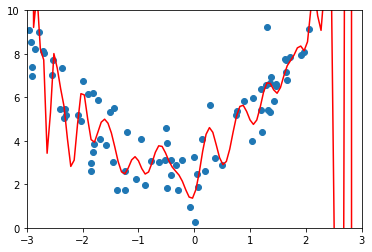

In [36]:
plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,10])
plt.show()

模型的泛化能力差



## train test split的意义

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

7.192553835398931

In [40]:
poly2_reg = poly_regression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297902

In [41]:
poly10_reg = poly_regression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150722

In [43]:
poly100_reg = poly_regression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

14075780333.752098